# Model for content based filtering
This notebook process data to create a ml model.

## Preprocessing data to ML Model

### Loading data from csv

In [20]:
import pandas as pd

# Load movies genre dataset
df1 = pd.read_csv("export_files\dataset_movies.csv")
df1.set_index("id",inplace=True)

# Load collection column dataset
df2 = pd.read_csv("export_files\dataset_collections.csv")
df2.set_index("id", inplace=True)

# Load keywords dataset
df3 = pd.read_csv("export_files\dataset_keywords.csv")
df3.set_index("id", inplace=True)

# Merge dataframes using left join
df = df1.merge(df2, how="left", left_index=True, right_index=True)
df = df.merge(df3, how="left", left_index=True, right_index=True)
df

,budget,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,...,avant-garde,school,robbery,dutch cabaret,"london, england",1970s,sibling relationship,surrealism,anthology,france
id,,,,,,,,,,,,,,,,,,,,,
2,0,Ariel,8.165,10/21/1988,0,73,6.8,157,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Varjoja paratiisissa,8.509,10/17/1986,0,74,7.2,158,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4000000,Four Rooms,14.441,12/9/1995,4257354,98,5.7,2127,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,21000000,Judgment Night,13.336,10/15/1993,12136938,110,6.5,230,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,42000,Life in Loops (A Megacities RMX),2.352,1/1/2006,0,80,7.5,18,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285854,0,Reunited,0.600,1/26/2010,0,90,4.3,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285855,0,Der Schrecken der Garnison,0.877,4/23/1931,0,86,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285856,0,Big Muddy,2.304,9/4/2014,0,104,4.9,6,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop Dates before 1900
We drop movies before 1900.

In [21]:
import re

def find_1800(date):
    """This function find for "yyyy-mm-dd" or "yyyy-dd-mm" format date.\n
    Return a bool series list where true if are occurence."""
    return bool(re.findall(r"18[0-9]{2}-[0-9]{2}-[0-9]{2}",date))

print("Rows to drop.")
print(df["release_date"][df["release_date"].apply(find_1800)])

Rows to drop.
id
160       1896-01-25
774       1895-03-22
16463     1888-10-14
16464     1888-10-15
16612     1894-03-14
             ...    
283448    1898-11-26
283969    1895-01-02
284553    1898-01-02
285521    1899-01-02
285674    1898-01-02
Name: release_date, Length: 789, dtype: object


In [22]:
drop_index = df["release_date"][df["release_date"].apply(find_1800)].index
df.drop(drop_index, inplace=True)

print("Rows in 'yyyy-mm-dd' format after drop")
print(df["release_date"][df["release_date"].apply(find_1800)])

Rows in 'yyyy-mm-dd' format after drop
Series([], Name: release_date, dtype: object)


### Extracting title and release date column
We will use this dataframe to extract name by id.

In [23]:
titles = df[["original_title","release_date"]]
titles

,original_title,release_date
id,,
2,Ariel,10/21/1988
3,Varjoja paratiisissa,10/17/1986
5,Four Rooms,12/9/1995
6,Judgment Night,10/15/1993
8,Life in Loops (A Megacities RMX),1/1/2006
...,...,...
285854,Reunited,1/26/2010
285855,Der Schrecken der Garnison,4/23/1931
285856,Big Muddy,9/4/2014


### Eliminate title column from dataframe

In [24]:
df.drop("original_title",axis=1,inplace=True)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,avant-garde,school,robbery,dutch cabaret,"london, england",1970s,sibling relationship,surrealism,anthology,france
id,,,,,,,,,,,,,,,,,,,,,
2,0,8.165,10/21/1988,0,73,6.8,157,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,8.509,10/17/1986,0,74,7.2,158,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4000000,14.441,12/9/1995,4257354,98,5.7,2127,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,21000000,13.336,10/15/1993,12136938,110,6.5,230,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,42000,2.352,1/1/2006,0,80,7.5,18,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285854,0,0.600,1/26/2010,0,90,4.3,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285855,0,0.877,4/23/1931,0,86,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285856,0,2.304,9/4/2014,0,104,4.9,6,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Transform date to ordinal

In [25]:
from datetime import datetime

def date_to_ordinal(date):
    """Transform date in format %Y/%m/%d to ordinal date type."""
    if date != "0":
        return datetime.strptime(date, "%m/%d/%Y").toordinal()
    else:
        return 0

#apply method apply function in all element column(s)
#transform method is similar to apply
df["release_date"] = df["release_date"].apply(date_to_ordinal)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,avant-garde,school,robbery,dutch cabaret,"london, england",1970s,sibling relationship,surrealism,anthology,france
id,,,,,,,,,,,,,,,,,,,,,
2,0,8.165,726031,0,73,6.8,157,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,8.509,725296,0,74,7.2,158,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4000000,14.441,728636,4257354,98,5.7,2127,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,21000000,13.336,727851,12136938,110,6.5,230,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,42000,2.352,732312,0,80,7.5,18,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285854,0,0.600,733798,0,90,4.3,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285855,0,0.877,705030,0,86,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285856,0,2.304,735480,0,104,4.9,6,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replacing 0 values to NaN values
In order to use NaN Euclidean Distance, a modified version of euclidean distance, we transform 0 values to np.nan values format using numpy library.

In [26]:
import numpy as np
df.iloc[:,0:7] = df.iloc[:,0:7].replace(0,np.nan)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,avant-garde,school,robbery,dutch cabaret,"london, england",1970s,sibling relationship,surrealism,anthology,france
id,,,,,,,,,,,,,,,,,,,,,
2,NaN,8.165,726031.0,NaN,73.0,6.8,157.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,8.509,725296.0,NaN,74.0,7.2,158.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4000000.0,14.441,728636.0,4257354.0,98.0,5.7,2127.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,21000000.0,13.336,727851.0,12136938.0,110.0,6.5,230.0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,42000.0,2.352,732312.0,NaN,80.0,7.5,18.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285854,NaN,0.600,733798.0,NaN,90.0,4.3,2.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285855,NaN,0.877,705030.0,NaN,86.0,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285856,NaN,2.304,735480.0,NaN,104.0,4.9,6.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalize data using MinMaxScaler

In [59]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler object (x-mu)/sigma
scaler = MinMaxScaler()
# Just normalize first 7 columns
scaler.fit(df.iloc[:, :7])

#Create new pandas dataframe
df_standard = pd.DataFrame(scaler.transform(df.iloc[:,:7]),columns=df.iloc[:,:7].columns)
df_standard["id"] = df.index
df_standard.set_index("id",inplace=True)

# Concat standar dataframe (first 7 columns) with df[:,7:]
df_standard = pd.concat([df_standard,df.iloc[:,7:]],axis=1)
df_standard

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,avant-garde,school,robbery,dutch cabaret,"london, england",1970s,sibling relationship,surrealism,anthology,france
id,,,,,,,,,,,,,,,,,,,,,
2,NaN,0.018780,0.699482,NaN,0.001667,0.663158,0.005006,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,0.019633,0.683632,NaN,0.001690,0.705263,0.005038,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.010526,0.034359,0.755661,0.001495,0.002245,0.547368,0.068218,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.055263,0.031616,0.738732,0.004263,0.002523,0.631579,0.007348,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000111,0.004349,0.834936,NaN,0.001829,0.736842,0.000545,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285854,NaN,0.000000,0.866983,NaN,0.002060,0.400000,0.000032,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285855,NaN,0.000688,0.246582,NaN,0.001968,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285856,NaN,0.004230,0.903256,NaN,0.002384,0.463158,0.000160,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory analysis

### Describe table

In [60]:
df_standard.iloc[:,0:7].describe()

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
count,14209.000000,171648.000000,167899.000000,10304.000000,147808.000000,131304.000000,131347.000000
mean,0.037563,0.006111,0.696276,0.018031,0.001941,0.555523,0.003257
std,0.076558,0.020282,0.206630,0.045050,0.003076,0.163924,0.023431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000932,0.000000,0.575005,0.000380,0.001597,0.473684,0.000032
50%,0.007895,0.001648,0.781799,0.002971,0.002060,0.578947,0.000160
75%,0.039474,0.004967,0.858572,0.014293,0.002315,0.652632,0.000513
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Features histogram

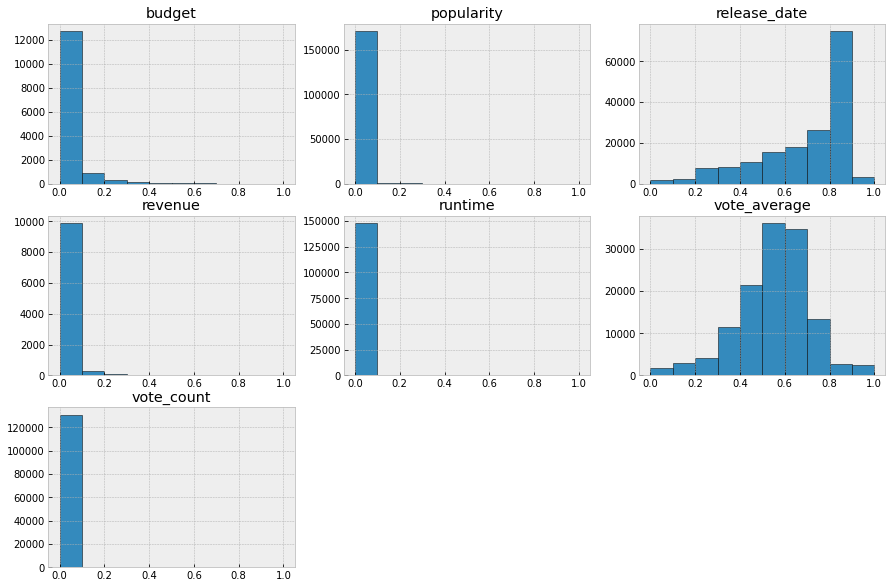

In [61]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.figure(figsize=(15,10))
for i in range(7):
    plt.subplot(3,3,i+1)
    plt.hist(df_standard.iloc[:,i],edgecolor="black")
    plt.title(df_standard.columns[i])
plt.show()

### BoxPlot

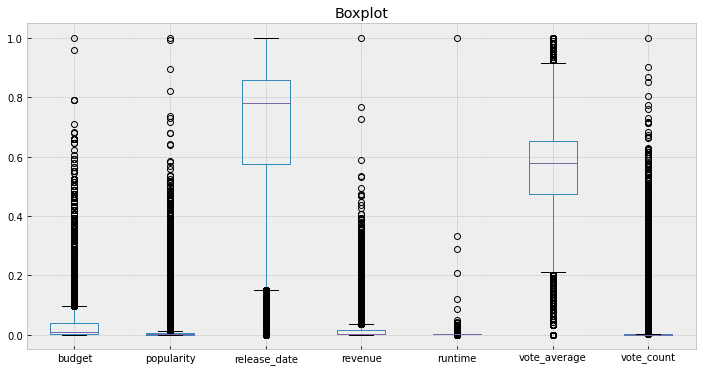

In [71]:
plt.figure(figsize=(12,6))
plt.style.use("bmh")
plt.title("Boxplot")
df_standard.iloc[:,:7].boxplot()
plt.show()

## Using Metric to fin top 10 Movies

### Looking for id Movie

In [77]:
from jellyfish import levenshtein_distance

# Looking for similarity names movies
movie_name = "Batman: The Dark Knight"

# Calculates distance beetwen movie name and list fo titles
idx = titles["original_title"].apply(
    lambda x: levenshtein_distance(movie_name,x))
idx = idx.sort_values()[:10]    # Sort vector distances and extract first 10
titles.loc[idx.index]           # Show title names

,original_title,release_date
id,,
50556,Batbabe: The Dark Nightie,2/24/2009
13851,Batman: Gotham Knight,7/8/2008
72003,The Dark Knight,7/11/2011
155,The Dark Knight,7/14/2008
69735,Batman: Year One,9/27/2011
230911,The Dark Light,4/23/1951
37935,One Dark Night,12/31/1982
35692,The Black Knight,8/26/1954
60597,Red: The Dark Side,3/9/2007


### Using euclidean distance to find similar movies

In [78]:
#from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import nan_euclidean_distances

movie_id = 13851 # Movie id to test
print("Selected movie: {} ({})".format(
      titles.loc[movie_id].values[0],
      titles.loc[movie_id].values[1]))
n = 10      # Number of similar movies

# Calculate distances (euclidean distance)
distances = nan_euclidean_distances(
    df_standard.loc[movie_id].values.reshape(1, -1),
    df_standard)
distances = pd.DataFrame(distances,columns=df.index)

# Order values by ascending order
recomendations = distances.iloc[0].sort_values()[1:n+1]

# Get names of movies
top = titles.loc[recomendations.index]
top.columns = ["Title","Release Date"] # Rename columns
top

Selected movie: Batman: Gotham Knight (7/8/2008)


,Title,Release Date
id,,
56590,All Star Superman,2/22/2011
243914,熱風海陸ブシロード,12/30/2013
272297,Uzay Kuvvetleri 2911,5/16/2014
67818,To: A Space Fantasy,5/27/2010
115543,망치,8/30/2003
47556,宇宙戦艦ヤマト 復活篇,12/12/2009
104552,Once Upon a Time on Mars,2/10/1996
183011,Justice League: The Flashpoint Paradox,7/30/2013
256601,War of the Worlds: Goliath,7/14/2012


### Extract covers top 10
Function to extract request image object.

In [79]:
def extract_img(movie_id):
    # Api data and movie index example
    api_key = "44f9a7f09387a49408460a6d158e1f44"
    # URL to retrieve movie info
    url = "https://api.themoviedb.org/3/movie/" + \
        str(movie_id) + "?api_key=" + api_key
    # Making a request example
    request_obj = requests.get(url).text
    # Load dictionary with file info from request
    row = json.loads(request_obj)
    # Poster URL
    poster_url = "https://image.tmdb.org/t/p/w500"+str(row.get("poster_path"))
    return requests.get(poster_url)

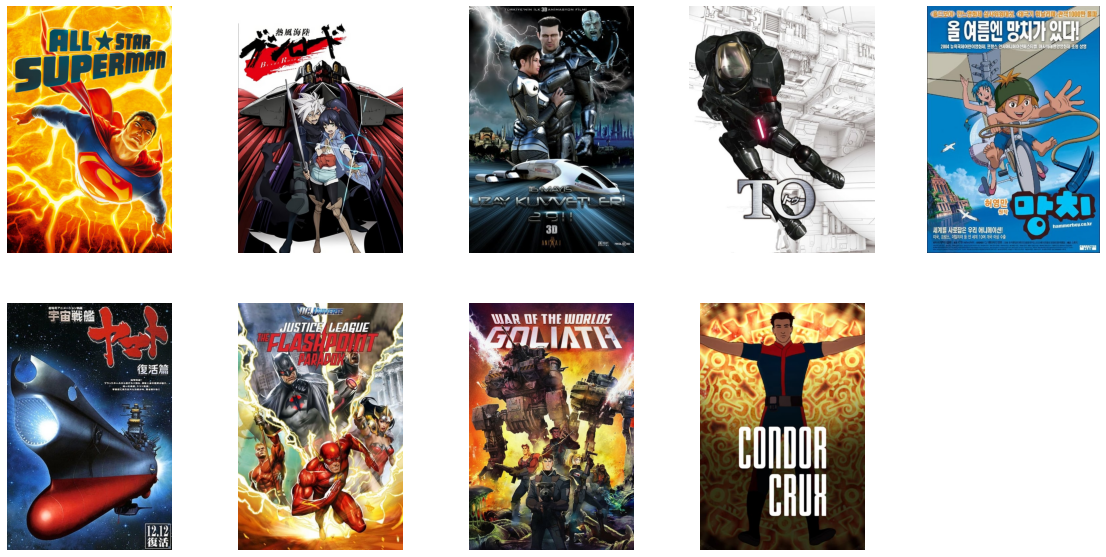

In [80]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO
import json
import requests

counter = 0
plt.figure(figsize=(20,10))
for movie_idx in top.index:
    poster_img = extract_img(movie_idx)
    if poster_img.status_code == 200:
        imshow = Image.open(BytesIO(poster_img.content))
        plt.subplot(int(np.ceil(n/5)), 5, counter+1)
        plt.axis('off')
        plt.imshow(imshow)
        counter += 1
plt.show()